### Numerical Intergartion and Differentiation

E/20/280 - Pathirage R.S.

Q1.
In composite Trapezoidal Rule, the error from the approximation of the intergral function over f(x) decays at 1/n^2 since the error is propotional to 1/(12*n^2).

In Composite Simpsoon's Rule, the error from the approximation of the intergral function over f(x) decays at 1/n^4 since the error is propotional to 1/(180*n^4).
ZZZ

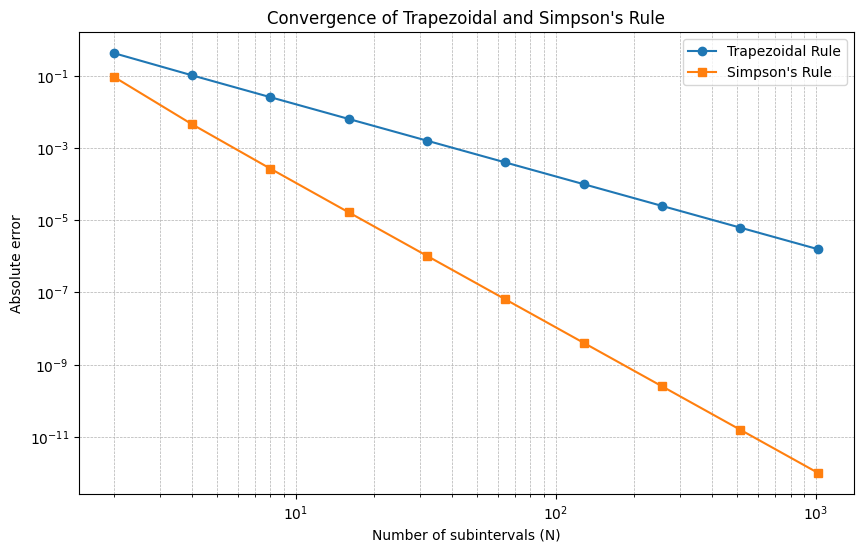

In [9]:
# import libraries
import matplotlib.pyplot as plt
# from scipy import integrate  # You can remove this line since it's not used
from numpy import array, linspace, size, log, polyfit  # Importing numpy for array operations
import numpy as np

# Composite Simpson's Rule
def simpson(func, a, b, N):
    if N % 2:
        raise ValueError("N must be even for Simpson's rule.")
    x = np.linspace(a, b, N + 1)
    h = (b - a) / N
    I = (func(x[0]) + func(x[-1]) +
            4 * np.sum(func(x[1:-1:2])) +
            2 * np.sum(func(x[2:-2:2]))) * h / 3.0
    return I

# Composite Trapezoidal Rule
def trapezoidal(func, a, b, N):
    x = np.linspace(a, b, N + 1)
    h = x[1] - x[0]
    I = np.sum(func(x[1:-1])) + 0.5 * (func(x[0]) + func(x[-1]))
    return I * h

# Define the function to integrate
def func(x):
    return np.sin(x)

# Exact integral of sin(x) from 0 to pi
exact_integral = 2.0

# Integration bounds
a, b = 0, np.pi

# Range of N values
N_values = np.array([2**k for k in range(1, 11)])  # N = 2, 4, 8, ..., 1024

# Compute errors
trapezoidal_errors = []
simpson_errors = []
for N in N_values:
    I_trapezoidal = trapezoidal(func, a, b, N)
    I_simpson = simpson(func, a, b, N)

    trapezoidal_errors.append(np.abs(I_trapezoidal - exact_integral))
    simpson_errors.append(np.abs(I_simpson - exact_integral))

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.loglog(N_values, trapezoidal_errors, 'o-', label='Trapezoidal Rule')
plt.loglog(N_values, simpson_errors, 's-', label="Simpson's Rule")
plt.xlabel('Number of subintervals (N)')
plt.ylabel('Absolute error')
plt.title("Convergence of Trapezoidal and Simpson's Rule")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Q2.


In [11]:
import numpy as np
# Define the function to integrate
def func(x):
    return x * np.log(x)
# Integration bounds
a, b = 1, 2
# Exact integral of x * log(x) from 1 to 2
exact_integral = 2 * np.log(2) - 0.75

# Number of subintervals
N = 12  
# Start with the minimum even number above our calculated min
# Compute numerical integral using Simpson's rule
numerical_integral = simpson(func, a, b, N)
# Compute absolute error
error = np.abs(numerical_integral - exact_integral)

print(f"Numerical integral: {numerical_integral}")
print(f"Exact integral: {exact_integral}")
print(f"Absolute error: {error}")


Numerical integral: 0.6362945608313058
Exact integral: 0.6362943611198906
Absolute error: 1.9971141518304592e-07


Q3.


The value of the integral from 0 to 1.5 is approximately: 0.8561883936249011
The value of the error function erf(1.5) is approximately: 0.9661051464753108


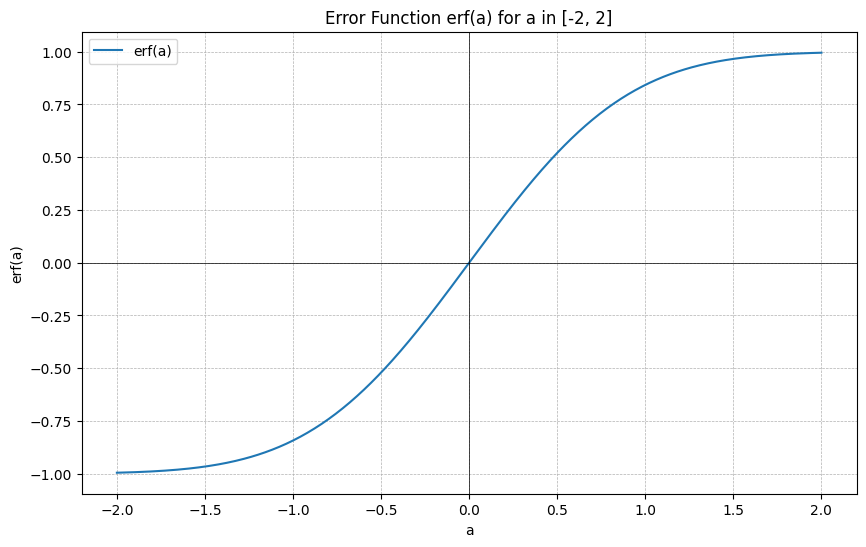

In [17]:
# Import the necessary library
from scipy.integrate import quad

# Define the integrand function
def integrand(x):
    return np.exp(-x**2)

# Define the upper limit of the integral
a = 1.5

# Compute the integral using scipy.integrate.quad
result, error = quad(integrand, 0, a)

# Compute the error function value
erf_value = (2 / np.sqrt(np.pi)) * result

print(f"The value of the integral from 0 to {a} is approximately: {result}")
print(f"The value of the error function erf({a}) is approximately: {erf_value}")

# Import the error function from scipy.special
from scipy.special import erf

# Define the range of 'a'
a_values = np.linspace(-2, 2, 500)

# Compute the error function values for the range of 'a'
erf_values = erf(a_values)

# Plotting the error function
plt.figure(figsize=(10, 6))
plt.plot(a_values, erf_values, label='erf(a)')
plt.xlabel('a')
plt.ylabel('erf(a)')
plt.title('Error Function erf(a) for a in [-2, 2]')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [22]:
import numpy as np
from scipy.special import roots_legendre
from scipy.integrate import quad
# Define the integrand function
def integrand(x):
    return np.exp(-x**2)
# Define the upper limit of the integral
a = 1.5
# Compute the exact integral using scipy.integrate.quad
exact_integral, _ = quad(integrand, 0, a)
# Function to perform Gauss-Legendre quadrature
def gauss_legendre_quadrature(func, a, b, n):
    nodes, weights = roots_legendre(n)
    # Change of variables to fit the interval [a, b]
    t = 0.5 * (nodes + 1) * (b- a) + a
    return 0.5 * (b- a) * np.sum(weights * func(t))
# Number of points for Gauss-Legendre quadrature
points = [2, 3, 4, 5]
# Compute integrals and relative errors
for n in points:
    gauss_integral = gauss_legendre_quadrature(integrand, 0, a, n)
    relative_error = np.abs(gauss_integral- exact_integral) / exact_integral
    print(f"Number of points: {n}")
    print(f"Gauss-Legendre Integral: {gauss_integral}")
    print(f"Relative Error: {relative_error}\n")



Number of points: 2
Gauss-Legendre Integral: 0.8633384521923847
Relative Error: 0.008351034212472744

Number of points: 3
Gauss-Legendre Integral: 0.8556538986506874
Relative Error: 0.0006242726229337497

Number of points: 4
Gauss-Legendre Integral: 0.8562100942814074
Relative Error: 2.534565601202751e-05

Number of points: 5
Gauss-Legendre Integral: 0.8561877895596879
Relative Error: 7.055283833338084e-07



In [23]:
import numpy as np
from scipy.special import roots_legendre
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
# Define the integrand function
def integrand(x):
    return np.exp(-x**2)
# Define the second derivative of the integrand
def second_derivative(x):
    return (4 * x**2- 2) * np.exp(-x**2)

# Trapezoidal rule implementation
def trapezoidal(func, a, b, N):
    x = np.linspace(a, b, N + 1)
    h = (b- a) / N
    integral = 0.5 * (func(x[0]) + func(x[-1])) + np.sum(func(x[1:-1]))
    return integral * h

# Compute the exact integral using scipy.integrate.quad
a = 1.5
exact_integral, _ = quad(integrand, 0, a)
# Gauss-Legendre quadrature function
def gauss_legendre_quadrature(func, a, b, n):
    nodes, weights = roots_legendre(n)
    t = 0.5 * (nodes + 1) * (b- a) + a # Change of variables to fit the interval [a, b]
    return 0.5 * (b- a) * np.sum(weights * func(t))
# Gauss-Legendre quadrature for 3 points
n = 3
gauss_integral_3 = gauss_legendre_quadrature(integrand, 0, a, n)
error_3_point = np.abs(gauss_integral_3- exact_integral)
print(f"3-point Gauss-Legendre Integral: {gauss_integral_3}")
print(f"Error: {error_3_point}")
# Find the maximum absolute value of the second derivative on the interval [0, 1.5]
result = minimize_scalar(lambda x:-np.abs(second_derivative(x)), bounds=(0, 1.5),
method='bounded')
max_f2 =-result.fun
print(f"Maximum |f''(x)| on [0, 1.5]: {max_f2}")
# Calculate the number of trapezoids required
required_error = error_3_point
b = 1.5
N = int(np.ceil(np.sqrt(((b- 0)**3 * max_f2) / (12 * required_error))))
print(f"Number of trapezoids required: {N}")

# Evaluate the integral using the trapezoidal rule with the obtained number of trapezoids
trapezoidal_integral = trapezoidal(integrand, 0, b, N)
relative_error_trapezoidal = np.abs(trapezoidal_integral- exact_integral) / exact_integral
print(f"Trapezoidal Integral: {trapezoidal_integral}")
print(f"Relative Error: {relative_error_trapezoidal}")

3-point Gauss-Legendre Integral: 0.8556538986506874
Error: 0.0005344949742136507
Maximum |f''(x)| on [0, 1.5]: 0.8925206405935732
Number of trapezoids required: 22
Trapezoidal Integral: 0.8560659282046451
Relative Error: 0.000143035599603806


Q1

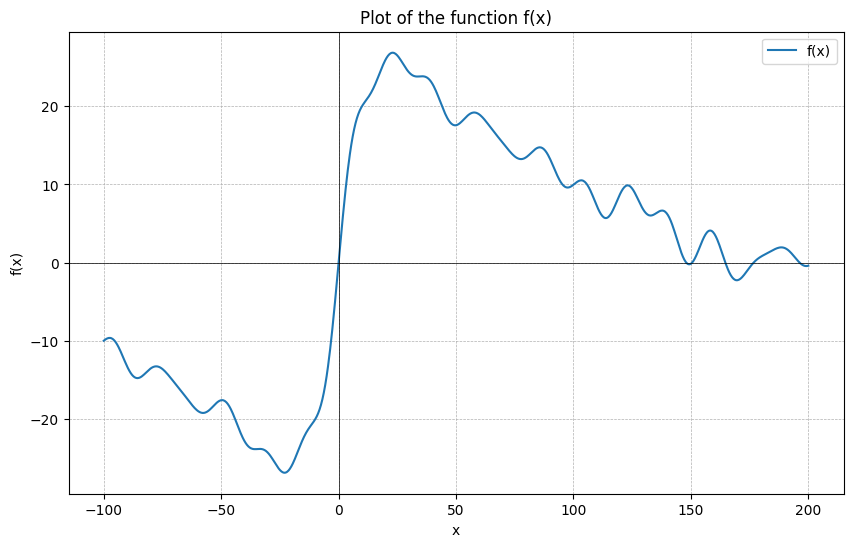

Estimated derivative f'(2): 3.079641430758784


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin
# Define the function
def f(x):
    n = 27
    t = 0
    for i in range(50):
        t += sin(10 * x / n)
        n = (n // 2) if n % 2 == 0 else 3 * n + 1
    return t
# Generate x values from-100 to 200
x_values = np.linspace(-100, 200, 1000)
# Compute the corresponding y values
y_values = [f(x) for x in x_values]
# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
# Define the forward difference method
def forward_diff(f, x, h):
    return (f(x + h)- f(x)) / h
x = 2
h = 1e-8
print(f"Estimated derivative f'(2): {forward_diff(f, x, h)}")

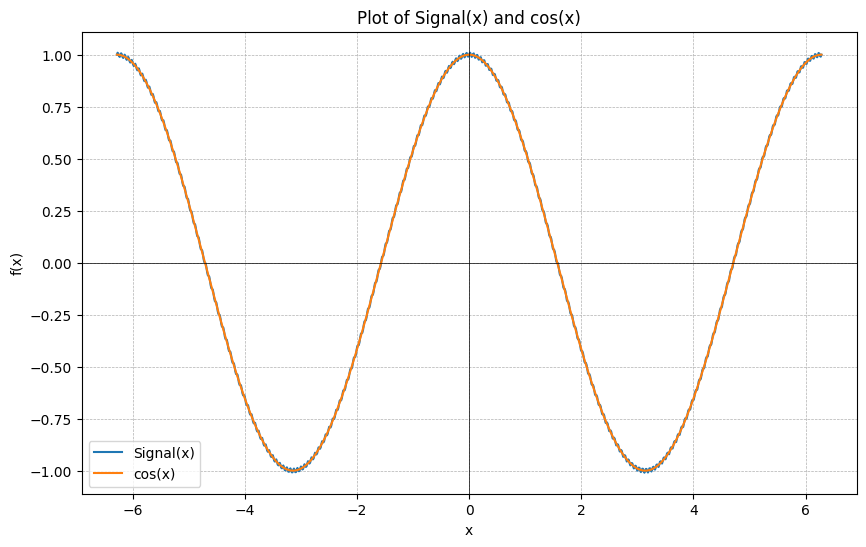

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Define the signal function
def signal(x, e, w):
    return np.cos(x) + e * np.sin(w * x)
# Define the cosine function
def cos(x):
    return np.cos(x)
# Parameters
e = 0.01
w = 100
# Generate x values from-2π to 2π
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
# Compute the corresponding y values
y_values = signal(x_values, e, w)
y_cos_values = cos(x_values)
# Plotting the functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Signal(x)')
plt.plot(x_values, y_cos_values, label='cos(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of Signal(x) and cos(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

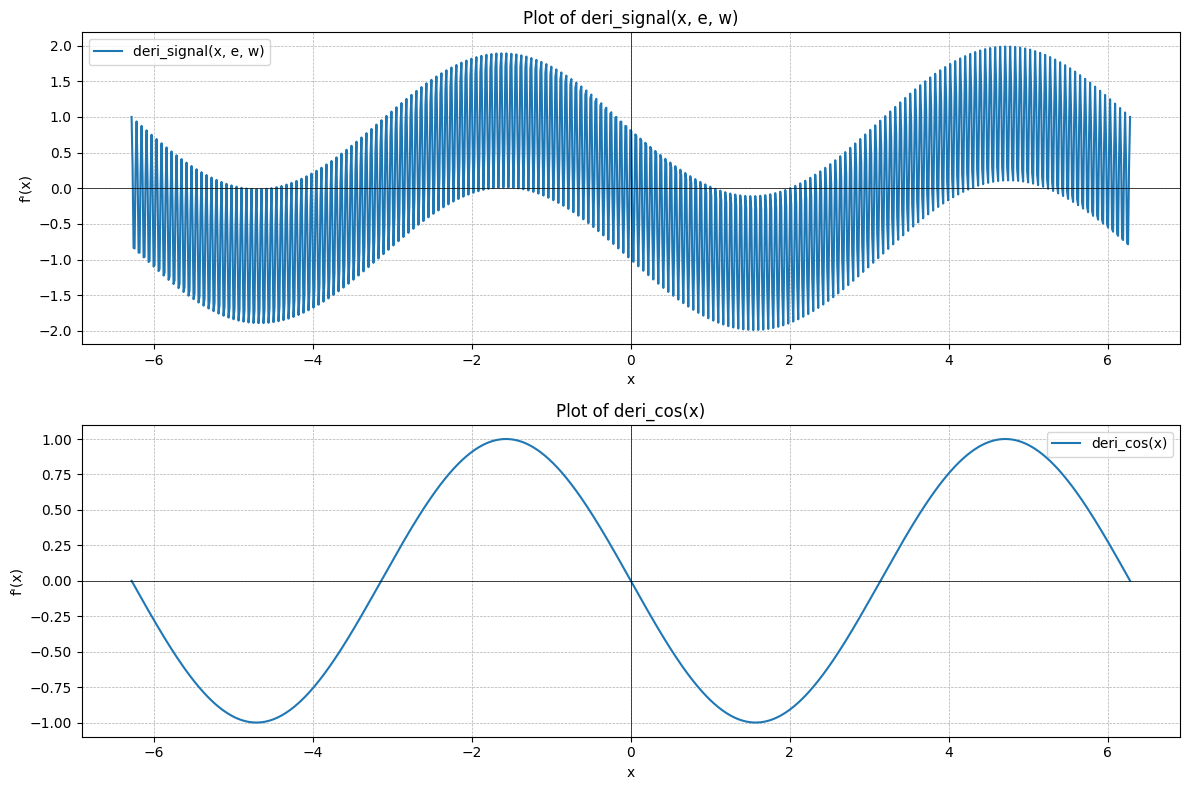

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# Define the derivative of signal function
def deri_signal(x, e, w):
    return (-1) * np.sin(x) + e * w * np.cos(w * x)
# Define the derivative of cosine function
def deri_cos(x):
    return (-1) * np.sin(x)
# Parameters
e = 0.01
w = 100
# Generate x values from-2*pi to 2*pi
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
# Compute the corresponding y values
y_deri_signal_values = deri_signal(x_values, e, w)
y_deri_cos_values = deri_cos(x_values)
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
# Plot deri_signal(x, e, w)
ax1.plot(x_values, y_deri_signal_values, label="deri_signal(x, e, w)")
ax1.set_xlabel('x')
ax1.set_ylabel("f'(x)")
ax1.set_title("Plot of deri_signal(x, e, w)")
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend()
# Plot deri_cos(x)
ax2.plot(x_values, y_deri_cos_values, label="deri_cos(x)")
ax2.set_xlabel('x')
ax2.set_ylabel("f'(x)")
ax2.set_title("Plot of deri_cos(x)")
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend()
# Adjust layout and show plot
plt.tight_layout()
plt.show()
